In [1]:
import numpy as np
import pandas as pd
import os, shutil

### Create new paths and place files

In [3]:
# Define routes

# orginal path
path_file_cat = 'data/PetImages/Cat'
path_file_dog = 'data/PetImages/Dog'

base_dir = 'data/Dataset'

# Train folder
Train_dir = os.path.join(base_dir, 'Train')

# cat folder in train
cat_train_dir = os.path.join(Train_dir, 'cat')

# dog folder in train
dog_train_dir = os.path.join(Train_dir, 'dog')

# Test Folder
Test_dir = os.path.join(base_dir, 'Test')

# cat folder in test
cat_test_dir = os.path.join(Test_dir, 'cat')

# dog folder in test
dog_test_dir = os.path.join(Test_dir, 'dog')

# validation folder
valid_dir = os.path.join(base_dir, 'validation')

# cat folder in validation
cat_val_dir = os.path.join(valid_dir, 'cat')

# dog folder in validation
dog_val_dir = os.path.join(valid_dir, 'dog')

In [ ]:
# Creating folders
os.mkdir(base_dir)

# Train folder
os.mkdir(Train_dir)

# cat folder in train
os.mkdir(cat_train_dir)

# dog folder in train
os.mkdir(dog_train_dir)

# Test Folder
os.mkdir(Test_dir)

# cat folder in test
os.mkdir(cat_test_dir)

# dog folder in test
os.mkdir(dog_test_dir)

# validation folder
os.mkdir(valid_dir)

# cat folder in validation
os.mkdir(cat_val_dir)

# dog folder in validation
os.mkdir(dog_val_dir)

In [4]:
train_list_cat_file = [f'{i}.jpg' for i in range(2,6500)]
train_list_dog_file = [f'{i}.jpg' for i in range(6500)]

test_list_cat_file = [f'{i}.jpg' for i in range(6500, 9500)]
test_list_dog_file = [f'{i}.jpg' for i in range(6500, 9500)]

val_list_cat_file = [f'{i}.jpg' for i in range(9500, 12500)]
val_list_dog_file = [f'{i}.jpg' for i in range(9500, 12500)]

In [ ]:
# organaize cat and dog in train folders
# cat
for filename in train_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_train_dir, filename)
    shutil.copyfile(src, dst)
    
# dog
for filename in train_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_train_dir, filename)
    shutil.copyfile(src, dst)
    
# organaize cat and dog in test folders
# cat
for filename in test_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_test_dir, filename)
    shutil.copyfile(src, dst)
    
# dog
for filename in test_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_test_dir, filename)
    shutil.copyfile(src, dst)
    
# organaize cat and dog in validation folders
# cat
for filename in val_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_val_dir, filename)
    shutil.copyfile(src, dst)
    
# dog
for filename in val_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_val_dir, filename)
    shutil.copyfile(src, dst)

In [7]:
print("number of cat img in train folder: ", len(os.listdir(cat_train_dir)))
print("number of dog img in train folder: ", len(os.listdir(dog_train_dir)))
print("number of cat img in test folder: ", len(os.listdir(cat_test_dir)))
print("number of dog img in test folder: ", len(os.listdir(dog_test_dir)))
print("number of cat img in validation folder: ", len(os.listdir(cat_val_dir)))
print("number of dog img in validation folder: ", len(os.listdir(dog_val_dir)))

number of cat img in train folder:  6498
number of dog img in train folder:  6500
number of cat img in test folder:  3000
number of dog img in test folder:  3000
number of cat img in validation folder:  3000
number of dog img in validation folder:  2999


In [16]:
from PIL import Image
for i in os.listdir(cat_train_dir):
    try:
        Image.open(os.path.join(cat_train_dir, i))
    except:
        os.remove(os.path.join(cat_train_dir, i))
        print(i)
for i in os.listdir(dog_val_dir):
    try:
        Image.open(os.path.join(dog_val_dir, i))
    except:
        os.remove(os.path.join(dog_val_dir, i))
        print(i)

666.jpg


In [8]:
import cv2

# Przykład wczytania obrazka z foldera treningowego (cat)
image_path = os.path.join(cat_train_dir, '5.jpg')  # Zaktualizuj 'nazwa_obrazka.jpg' na rzeczywistą nazwę obrazka
image = cv2.imread(image_path)

if image is not None:
    height, width, channels = image.shape
    print(f'Wymiary obrazka: Wysokość={height}, Szerokość={width}, Kanały={channels}')
else:
    print('Nie udało się wczytać obrazka.')

Wymiary obrazka: Wysokość=144, Szerokość=176, Kanały=3


## Creating a model architecture

In [5]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [16]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    directory=Train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=42)

validation_generator = test_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=42)
test_generator = test_datagen.flow_from_directory(
    directory=Test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    seed=42)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

Found 12997 images belonging to 2 classes.
Found 5999 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


## Check generator

In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


## Model training

In [59]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/25
300/649 [============>.................] - ETA: 2:51 - loss: 0.6903 - acc: 0.5328

KeyboardInterrupt: 

## Save model's weights

In [ ]:
model.save_weights('first_try.h5', overwrite=True)

## Result Plot

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


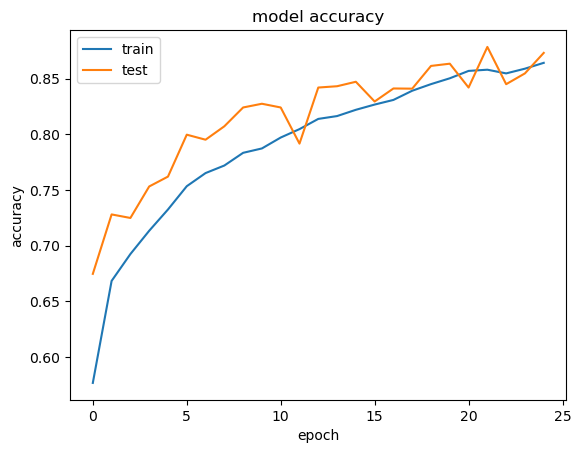

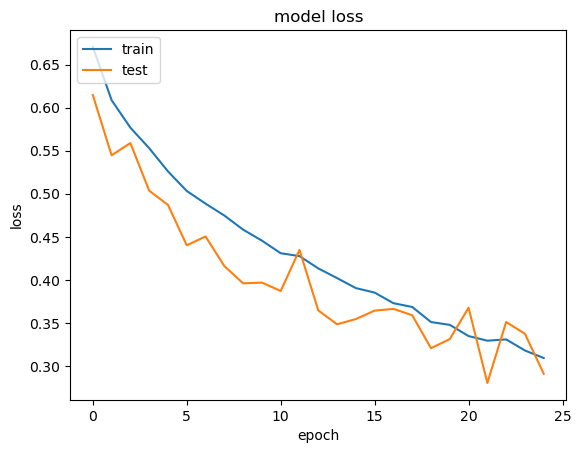

In [ ]:
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

## Save and Load the model architecture

In [9]:
saved_model = model.to_json()
import json
with open('model_architecture.json', 'w') as outfile:
    json.dump(saved_model, outfile)

In [10]:
from keras.models import model_from_json
loaded_model = model_from_json(json.load(open('model_architecture.json', 'r')))

In [11]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

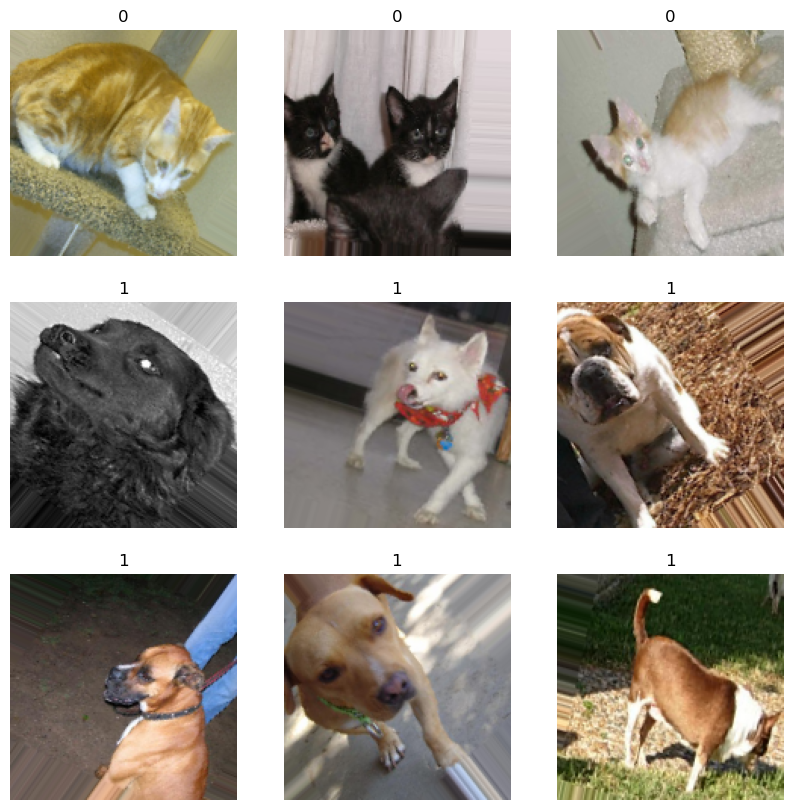

In [17]:
import matplotlib.pyplot as plt

# Pobieranie wsadu obrazów i etykiet
for data_batch, labels_batch in train_generator:
    break  # Zatrzymujemy się po pierwszym wsadzie

# Definiowanie rozmiaru figury dla wykresu
plt.figure(figsize=(10, 10))

# Wyświetlanie pierwszych 9 obrazów z wsadu
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data_batch[i])
    plt.title(int(labels_batch[i]))
    plt.axis("off")

# Wyświetlanie wykresu
plt.show()

In [20]:
model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

C:\Users\sieli\AppData\Local\Temp\ipykernel_15068\1045673133.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=validation_generator,


[0.2896984815597534, 0.8735786080360413]

In [18]:
model.load_weights('first_try.h5')

In [19]:
len(validation_images)

20

1/1 [==============================] - 0s 225ms/step


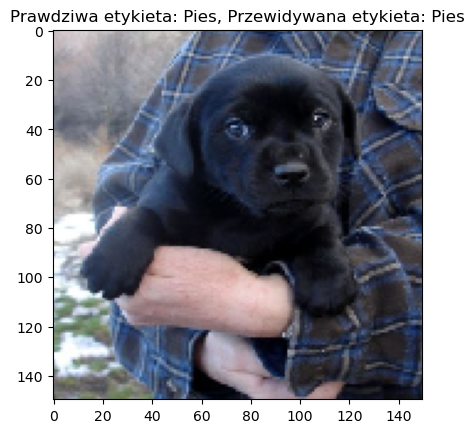

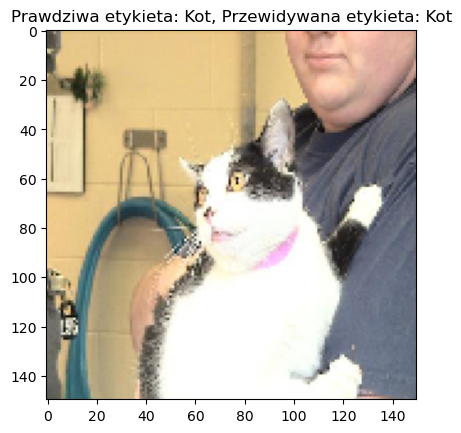

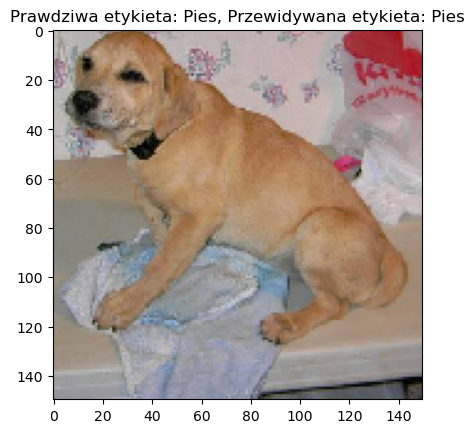

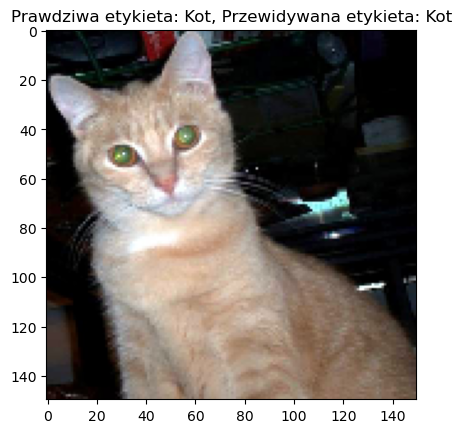

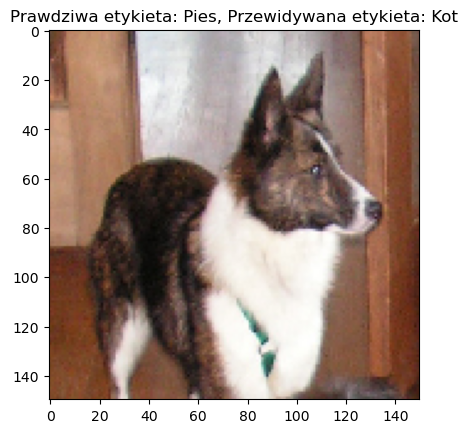

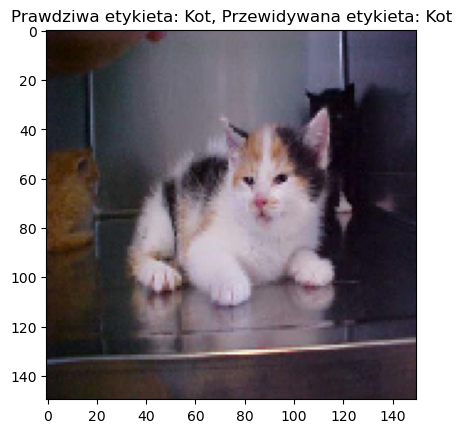

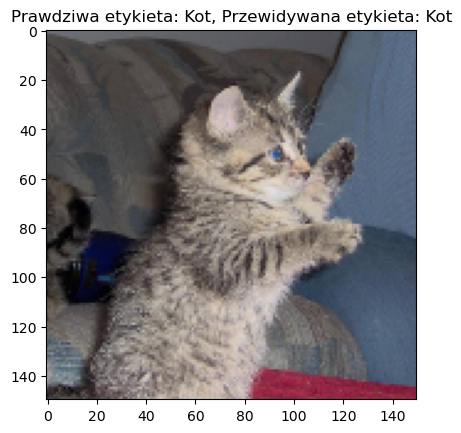

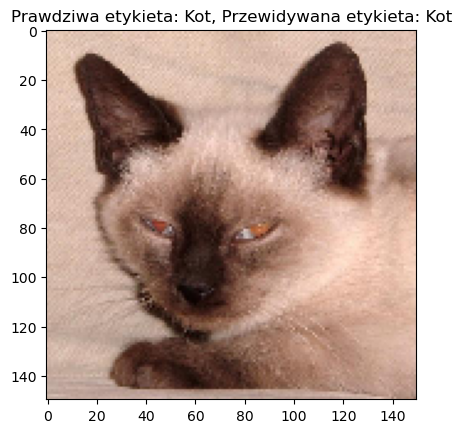

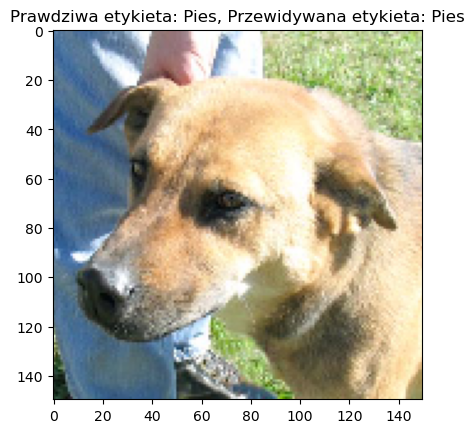

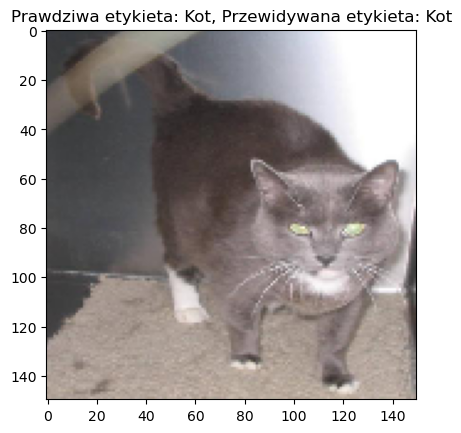

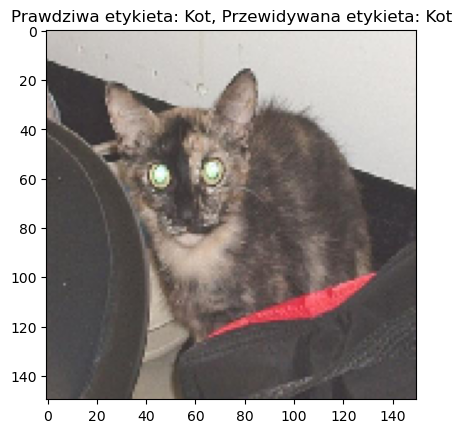

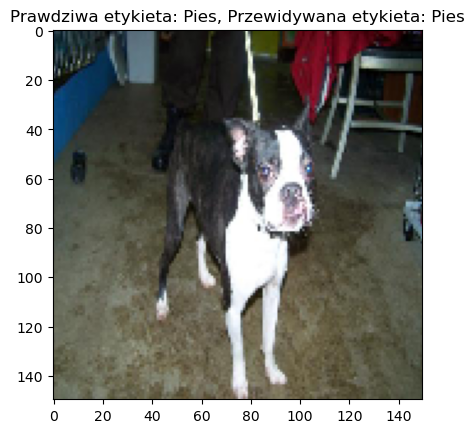

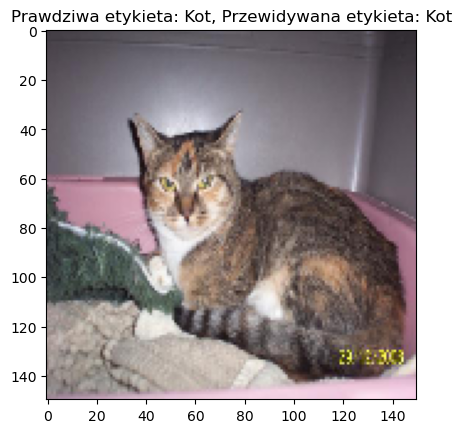

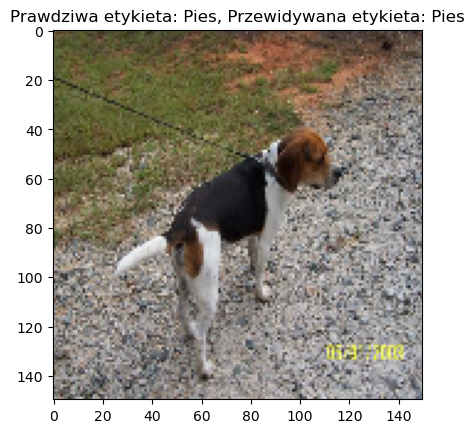

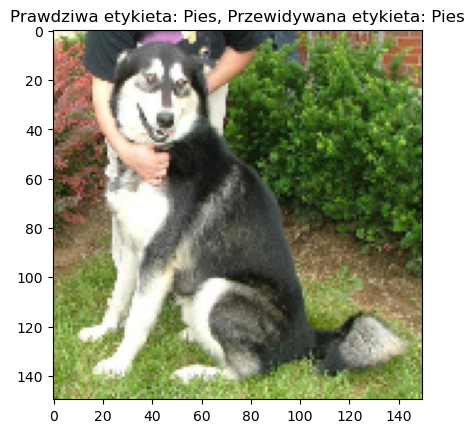

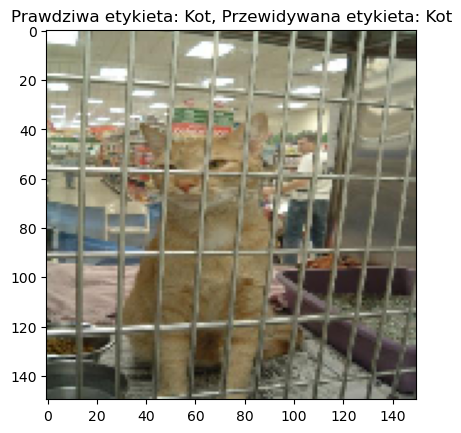

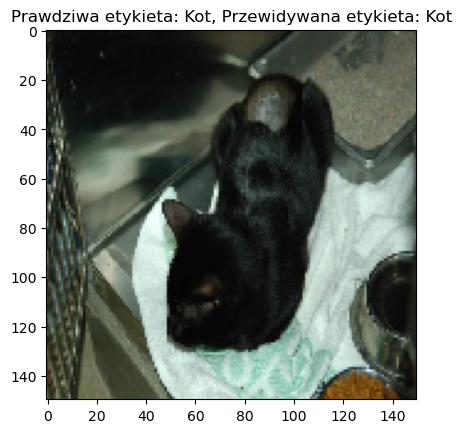

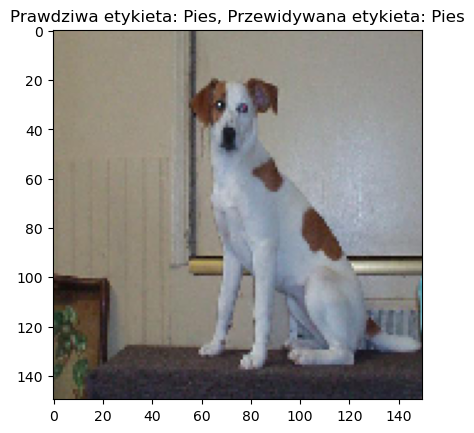

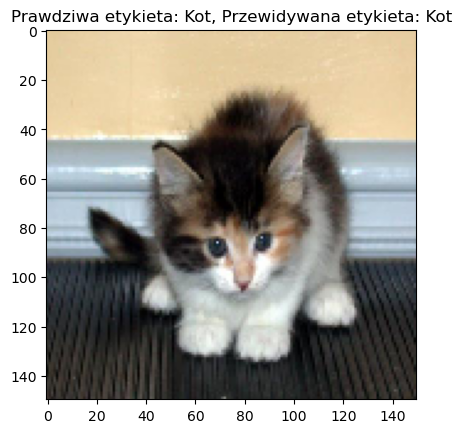

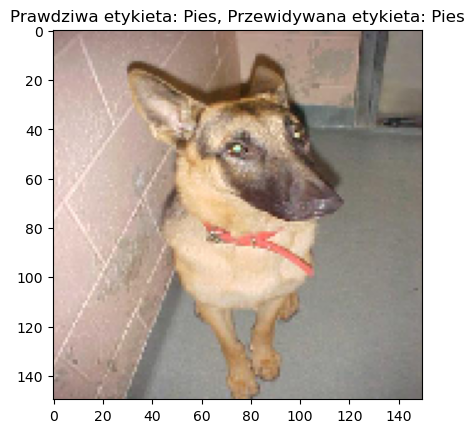

In [21]:
# Pobieranie obrazów i etykiet z generatora walidacyjnego
validation_images, validation_labels = next(validation_generator)

# Przewidywanie klas dla obrazków
validation_predictions = model.predict(validation_images)

# Wizualizacja wyników
for i in range(len(validation_images)):
    plt.imshow(validation_images[i])
    true_label = "Kot" if validation_labels[i] == 0 else "Pies"
    predicted_label = "Kot" if validation_predictions[i] < 0.5 else "Pies"
    
    plt.title(f'Prawdziwa etykieta: {true_label}, Przewidywana etykieta: {predicted_label}')
    plt.show()